In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import powerlaw as pl #This is the package to do the powerlaw fit. Install it from pip

import scipy.stats as st


In [7]:
help(pl.Fit)

Help on class Fit in module powerlaw:

class Fit(builtins.object)
 |  Fit(data, discrete=False, xmin=None, xmax=None, verbose=True, fit_method='Likelihood', estimate_discrete=True, discrete_approximation='round', sigma_threshold=None, parameter_range=None, fit_optimizer=None, xmin_distance='D', xmin_distribution='power_law', **kwargs)
 |  
 |  A fit of a data set to various probability distributions, namely power
 |  laws. For fits to power laws, the methods of Clauset et al. 2007 are used.
 |  These methods identify the portion of the tail of the distribution that
 |  follows a power law, beyond a value xmin. If no xmin is
 |  provided, the optimal one is calculated and assigned at initialization.
 |  
 |  Parameters
 |  ----------
 |  data : list or array
 |  discrete : boolean, optional
 |      Whether the data is discrete (integers).
 |  xmin : int or float, optional
 |      The data value beyond which distributions should be fitted. If
 |      None an optimal one will be calculate

In [8]:
#Using index_col=0 you set the first column as index (not necessary but fancy)
returns = pd.read_csv('long_series_logret.csv',index_col=0) 

In [9]:
returns

,NAV
index,
1962-01-03,0.014286
1962-01-04,-0.011891
1962-01-05,0.009524
1962-01-08,-0.014320
1962-01-09,-0.009662
...,...
2020-03-25,0.058730
2020-03-26,0.065813
2020-03-27,-0.120113


In [10]:
returns.index[0]

'1962-01-03'

Another useful function is pd.DatetimeIndex. It can take a list of strings with a datetime format 
and convert it in a datatime object.

That is not necessary, but it makes the life easier

In [11]:

returns.index = pd.DatetimeIndex(returns.index)

Then you can easily obatin for example the year of the data point

In [12]:
returns.index.year

Index([1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962,
       ...
       2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
      dtype='int32', name='index', length=14661)

or the weekday

In [13]:
returns.index.weekday

Index([2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       ...
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1],
      dtype='int32', name='index', length=14661)

or apply a mask to the dataframe to select the observations

In [14]:
returns[returns.index.year>=1999]

,NAV
index,
1999-01-04,-0.026668
1999-01-05,0.080043
1999-01-06,0.070239
1999-01-07,-0.023531
1999-01-08,-0.016000
...,...
2020-03-25,0.058730
2020-03-26,0.065813
2020-03-27,-0.120113


For now we are not interseted in the time, because the question is about the distribution.

The distribution is a function that describes the frequency of the elements. In our case the elements are 
the return only

In [15]:
returns = returns['NAV']

In [16]:
len(returns)  #check the size

14661

The method x.isna() outputs a vector of true and false.

 If the i-element of x is NaN than the i-element of x.isna() is True. 
 
 If you sum a vector of True and False, python automatically casts True to 1 False to 0

In [17]:
returns.isna().sum() #check that you don't have NaN. 

0

In [18]:
#Inspecting the distribution

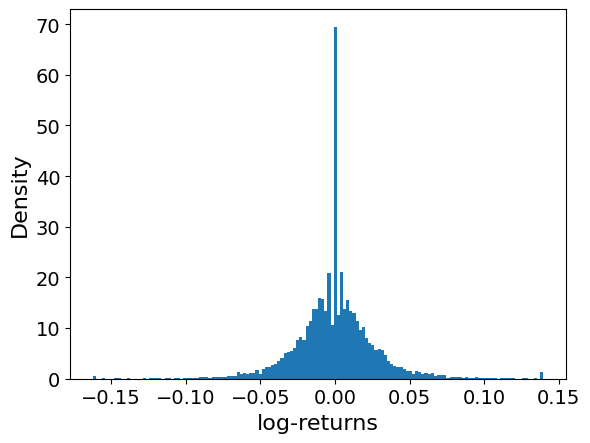

In [19]:
plt.hist(returns,bins='auto',density=True)
plt.xlabel('log-returns',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

Note that I can input "returns" because the time is an index. If I have the time as a columns (like most of you) I've to select only the columns of the returns.
I'll show you that

In [20]:
returns = pd.read_csv('long_series_logret.csv') 

In [21]:
# Now the time is a column. Don't get fooled by the fact that the column name is "index"
# check the different layouts

returns

,index,NAV
0,1962-01-03,0.014286
1,1962-01-04,-0.011891
2,1962-01-05,0.009524
3,1962-01-08,-0.014320
4,1962-01-09,-0.009662
...,...,...
14656,2020-03-25,0.058730
14657,2020-03-26,0.065813
14658,2020-03-27,-0.120113
14659,2020-03-30,-0.099241


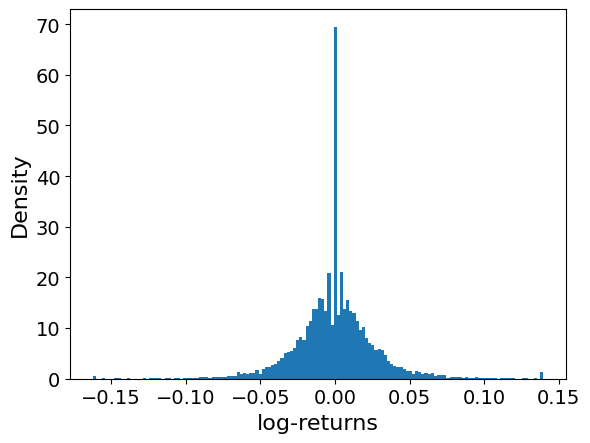

In [24]:
#That works
plt.hist(returns['NAV'],bins='auto',density=True)
plt.xlabel('log-returns',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [25]:
# There is a suspicius spike at zero

In [26]:
# Maybe they changed the way of recording the returns. 
# Maybe is a low-capitalized stock
# Maybe for some reason it was not traded many days... we don't know.

In [27]:
#The powerlaw fit is robust because it tries to fit only the tail

ft = pl.Fit(abs(returns['NAV']))

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


In [28]:
ft.alpha,ft.xmin

(4.118580914552373, 0.0566189282134636)

In [29]:
# The t-student fit is less because it tries to fit the whole distribution

v,loc,scale = st.t.fit(returns['NAV'])

In [30]:
v

2.6138054246862303

In [31]:
#I'm bored to write NAV all the time
returns = returns['NAV']

In [32]:
# This function computes a curve with a powerlaw exponent between xmin, xmax.
# you can shift on the vertical axis the curve with ymax parameter

def compute_powerlaw_curve(xmin,xmax,ymax,alpha): 
    
    dx = np.linspace(xmin,xmax,100) 
    
    y = dx**(-alpha)
    
    return dx,  ymax*y/y[0] #The output are the x and y ready for the plot
    

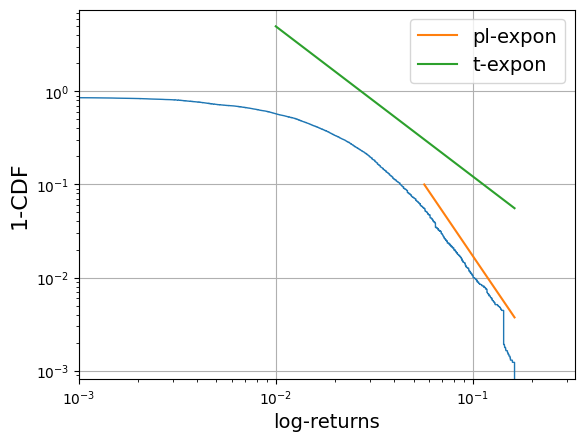

In [33]:
# CDF can be binless, it is not useful having a bin lower than the observations
bn = sorted(set(abs(returns))) 


plt.hist(abs(returns),bins=bn,density=True,cumulative=-1,histtype='step')

#Remember that the CDF has the esponent shifted by one
dx,dy = compute_powerlaw_curve(ft.xmin, max(abs(returns)), 1e-1,  ft.alpha-1) 
plt.plot(dx,dy,label='pl-expon') 

#The xmin,xmax,ymax are manually tuned to have a comprehensible plot. Try to change them
dx,dy = compute_powerlaw_curve(1e-2,max(abs(returns)),5,v-1)
plt.plot(dx,dy,label='t-expon')


plt.yscale('log')
plt.xscale('log')
plt.xlim(xmin=1e-3)
plt.xlabel('log-returns',fontsize=14)
plt.ylabel('1-CDF',fontsize=16)
plt.legend(loc='best',fontsize=14)
plt.grid()

They should coincide, but they are not. The power-law fit is better than the t-dist.

The reason is that the t-fit tries to fit the whole distribution, but we have an anomaly (the zero).

Differently, the power-law regression dumps everything before xmin=0.056, so it removes the zeros.

In [34]:
#Let's try to identify if the zeros are everywere or just in a period.
# Maybe we can remove that period

Text(0, 0.5, 'IS ZERO?')

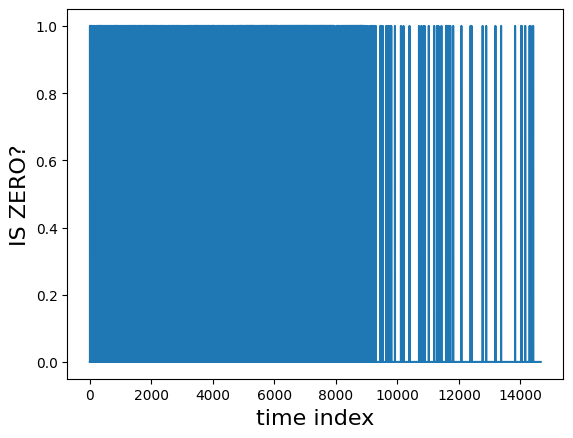

In [35]:
#Let's tray to plot when is equal to zero and is not (True and false are cast to 0,1)

#The plot is not very clear
# It seems that at the end of the time-series there are less zero
plt.plot( (returns==0),'-' ) 
plt.xlabel('time index',fontsize=16)
plt.ylabel('IS ZERO?',fontsize=16)

If we do the cumulative sum we can see that the most of the zero returns are 
before time-index=10000

Text(0, 0.5, '# of zero before time-index')

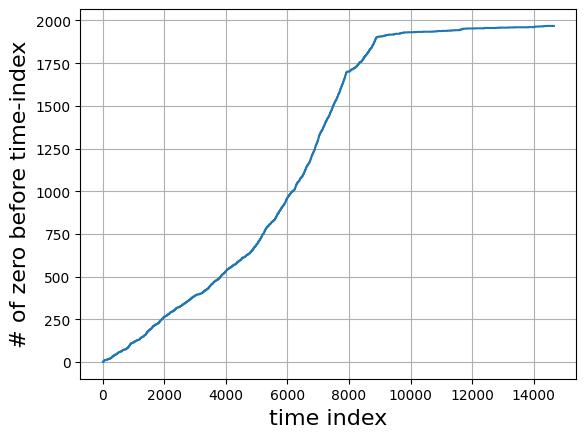

In [36]:
plt.plot( np.cumsum(returns==0) ) #With a cumulative sum I see 
plt.grid()
plt.xlabel('time index',fontsize=16)
plt.ylabel('# of zero before time-index',fontsize=16)

In [37]:
#To select the obeservations from 10000 to the end, in pandas we need iloc (othewise conver it in numpy)
partial_returns = returns.iloc[10000:]

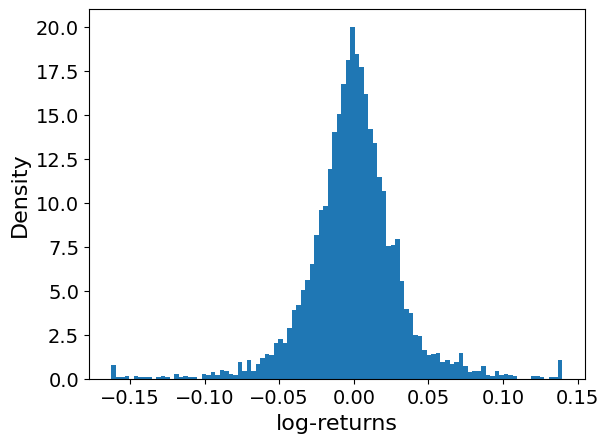

In [38]:
plt.hist(partial_returns,bins=100,density=True) # zero problem solved (almost)
plt.xlabel('log-returns',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [39]:
#The powerlaw fit is robust because it try to fit only the tail

ft = pl.Fit(abs(partial_returns))

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit


In [40]:
ft.alpha,ft.xmin

(3.144003740235837, 0.0327078708855896)

In [41]:
# The t-student fit is less because it try to fit the whole distribution

v,loc,scale = st.t.fit(partial_returns)

In [42]:
#Much more similar now
v,loc,scale 

(3.1153095013320304, -3.298060714116459e-05, 0.02026207252077774)

In [43]:
#Plot the 1-CDF 

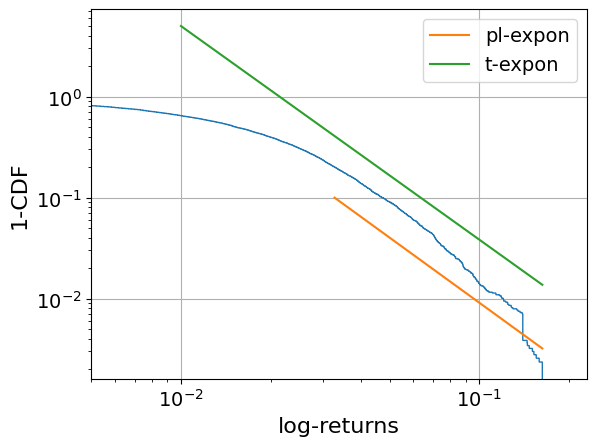

In [44]:
bn = 1000

plt.hist(abs(partial_returns),bins=bn,density=True,cumulative=-1,histtype='step')

dx,dy = compute_powerlaw_curve(ft.xmin,max(abs(partial_returns)),1e-1,ft.alpha-1)
plt.plot(dx,dy,label='pl-expon')

dx,dy = compute_powerlaw_curve(1e-2,max(abs(partial_returns)),5,v-1)
plt.plot(dx,dy,label='t-expon')


plt.yscale('log')
plt.xscale('log')
plt.xlim(xmin=5e-3)
plt.xlabel('log-returns',fontsize=16)
plt.ylabel('1-CDF',fontsize=16)
plt.legend(loc='best',fontsize=14)
plt.tick_params(labelsize=14)
plt.grid()
plt.show() 

# Do you see that the power-law is not perfect?
# The real world is not a model

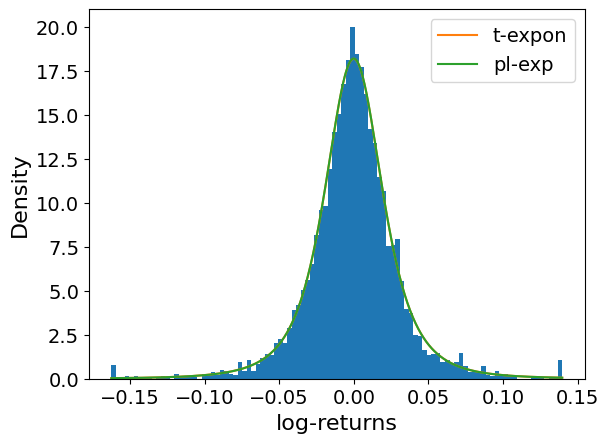

In [45]:

plt.hist(partial_returns,bins=100,density=True)

#To plot the theoretical pdf we need a list of x-values
m,M = min(partial_returns),max(partial_returns)
dx = np.linspace(m,M,1000)

plt.plot(dx,st.t.pdf(dx,v,loc,scale),label='t-expon')
plt.plot(dx,st.t.pdf(dx,ft.alpha,loc,scale),label='pl-exp')

plt.xlabel('log-returns',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.legend(loc='best',fontsize=14)
#Almost solved, even if, we still have a tiny anomaly.

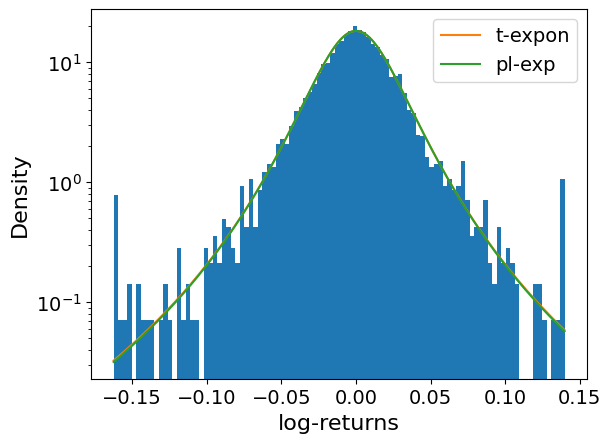

In [46]:
#Also in y-log scale the fits works quite well

plt.hist(partial_returns,bins=100,density=True)

#To plot the theoretical pdf we need a list of x-values
m,M = min(partial_returns),max(partial_returns)
dx = np.linspace(m,M,1000)

plt.plot(dx,st.t.pdf(dx,v,loc,scale),label='t-expon')
plt.plot(dx,st.t.pdf(dx,ft.alpha,loc,scale),label='pl-exp')

plt.yscale('log')
plt.xlabel('log-returns',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.tick_params(labelsize=14)
plt.legend(loc='best',fontsize=14)


In [47]:
# Both estimators are quite good

In [48]:
# For the last part of the assigment let's do a sliding window

In [49]:
T = partial_returns.shape[0] #Total number of returns

dt=1000 # I'm using a sliding window of 1000 days

estimators =[]
for t in np.arange(0,T-dt,15): # I compute that every 15 days to speed up a little bit
    
    rs = partial_returns.iloc[t:t+dt]
    
    v = st.t.fit( rs )[0]
    estimators.append( ( pl.Fit( abs(rs) ).alpha, v ) )
    print(estimators[-1])

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.4447185712338526, 4.5163000890183)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.4558962146478636, 4.515290927946536)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.514074871349081, 4.70251797760179)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.518792935540374, 4.688467758883084)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.499929996031689, 4.5304043029326815)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.44641017892799, 4.529980528236323)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.4365904723986445, 4.465080776571996)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.4441476294629774, 4.470176189045584)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.4645660682782897, 4.500562324527525)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.434301608011988, 4.318607480834493)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3835697594907646, 4.189987329777474)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3697374609738993, 4.022860127613645)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.2498044481878083, 3.7678395868921024)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.251579120733477, 3.762229171151966)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.334560867031806, 3.845564644699407)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3317987361964443, 3.8755265823783436)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3756218912712637, 3.977131081407504)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.471850899571883, 4.0036255279945685)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6668385814742503, 4.432616239350056)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.7398404031038037, 4.464559099395958)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.7300959323390046, 4.386271457103227)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.844502552411508, 4.699108920757116)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9042086861087935, 4.685534938802517)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8939377154039736, 4.604967459858409)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9628868769077887, 4.661398522028037)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.13800813183973, 5.150868633529134)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.1638264251492565, 5.317497771763309)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.0617689186054085, 4.89078384563952)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.080109604333378, 4.961699637469367)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.105755471321769, 4.961272684337743)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.043158928233563, 4.881136852639525)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.0981925442677305, 4.984028374118071)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9710714208246913, 4.883353692528902)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.296270224612009, 4.626064303149236)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.319971189600258, 4.660414514573869)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.297464283993454, 4.710415814286746)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.323076693891426, 4.745994502147935)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.259403198220369, 4.66102131732951)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.2415211684656144, 4.7145985791191425)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8812514752754006, 4.326849977017641)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9672012321982053, 4.297377097611611)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9672012321982053, 4.193607267521545)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.931384866602675, 4.043234441958861)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.93978130972376, 4.078555800427425)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.922862815310724, 3.953021458359287)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.1279953367071, 4.188106796771287)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.073520637493215, 4.310026081798054)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.031931156989081, 4.184196837132605)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.022230757284202, 4.174564379091578)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.064755837584746, 4.103681593315601)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.019055339657724, 4.033929557629056)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.886213937219036, 3.9483101943774144)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.5502523811879363, 3.1595991284367875)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.3200728718008468, 2.8140477324238735)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0899082812696124, 2.510127562012607)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.008374956684753, 2.458750030519543)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.9646856344007357, 2.3912211970776633)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.95514563662838, 2.4089001435937236)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.920106336732247, 2.3907214229238862)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(2.8756328339347403, 2.3747842474814727)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.8640937872116483, 2.3283217996376964)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(2.834629169027137, 2.330673643527163)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.819849339281822, 2.3287309365725437)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.8216839237440876, 2.3361952029857953)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.825691319244051, 2.406945637899679)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.8324182112338594, 2.4320727262655497)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.841273653643886, 2.4543146540093215)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.85085733719541, 2.4763752095741935)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.851115743941386, 2.4752438588067145)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.8458101834253338, 2.492297397098741)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.8541150793015455, 2.5191497413757666)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.860327294782076, 2.5755373704801308)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.875018339502274, 2.603231800907532)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.879827973579605, 2.6005505944575917)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.9057171817228737, 2.6239047803132234)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.883195552681162, 2.606121834319563)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.8829282181004494, 2.6350153396920453)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.874988350840897, 2.6469022328491656)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(2.887845926637562, 2.6562257771393982)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.698173216062832, 2.7408968024679954)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.7145448915396813, 2.7506508419765616)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.715496481769839, 2.73254323301971)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.715496481769839, 2.7371631056640613)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.76139151383403, 2.754378836301319)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.743498945717432, 2.796468858586158)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9053705410141752, 2.8700804966856355)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9053705410141752, 2.8940871710913383)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9053705410141752, 2.9584164723667543)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8818404192781526, 2.959334599182233)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8818404192781526, 2.931599418071267)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8818404192781526, 2.898882554367433)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.8818404192781526, 2.890557387931426)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9136141897400916, 2.8738193780939856)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9136141897400916, 2.8178288746977693)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9284385089358707, 2.8042257194466544)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9284385089358707, 2.7777690238944395)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9284385089358707, 2.754124521436695)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.9518679382997663, 2.7484718655693046)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9243590559364825, 2.751964483331841)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9092043936629737, 2.739178511403551)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8042121325295324, 2.693530250585108)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8042121325295324, 2.715231940625557)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9011960519552242, 2.747548916319846)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9606199254292176, 2.749746902039902)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9411440743909583, 2.7836635653581445)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8983266500403526, 2.840279753338703)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8297378924456935, 2.904075723966917)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8335710085745283, 2.9645633457414657)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8287883185494858, 3.031099935994549)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8287883185494858, 2.994560508241162)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8287883185494858, 2.9856830152897933)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8287883185494858, 3.0971027351760148)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.8152185251495148, 3.1837939996563644)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.837728646661599, 3.2710553294211264)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.752964399234007, 3.1852956776295587)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.7970741861979547, 3.076692373831033)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.7467214752067752, 3.0640271463009396)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6936602554157383, 3.050345259936398)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.8388898433823595, 3.0543363771799643)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.905587444299042, 3.2380002985470924)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.254933041779793, 3.7506699338301885)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.395899507451444, 3.964668773869147)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1732511160259147, 3.886394804324623)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.342660095734948, 4.139254011433469)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(4.363777407684653, 4.103847181628613)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.4566054743902455, 4.210084012728833)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.596887584131795, 4.1414635586240465)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.6812449460673657, 4.348154103765679)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.69507257305746, 4.365992663071815)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.7194249350549637, 4.405079621022496)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.5212871397800263, 4.307808582144935)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.493159710988527, 4.165773494927862)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.46983705071256, 4.081584081455379)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6216984677392854, 4.059395175764282)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6213872010130053, 4.044972911489117)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.64324287091095, 4.004936748533787)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.50266924831588, 4.0059958279971415)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.5006042475997226, 4.012416417011838)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.514209110287117, 3.9769165264440742)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.58928525369337, 3.971570937057166)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.5797183538574964, 3.89427249767127)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.551966247372912, 3.877755783450965)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.277632388435679, 3.8653516467751565)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.5652686299485357, 3.8816203236963185)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.5835093774711875, 3.926744022361234)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.645187011100827, 3.9608078937615243)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.594259412580207, 3.883196681666367)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6249441060868746, 3.899033034490378)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.5818367641434343, 3.891382630392071)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.5855072621710344, 3.7899972472827734)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6116162834460623, 3.731929529208376)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6667476529334047, 3.64260596680452)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6220777849917942, 3.639719925779448)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.7015606396638985, 3.6661268255821104)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6874040825897154, 3.6826869444539696)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.6936125142086356, 3.707348679435007)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.6510558780423414, 3.6151755695541676)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6486837426790424, 3.669255606114498)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.593541004106587, 3.649455466668281)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6443976606242248, 3.64423851782625)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.610364185390537, 3.62478187383459)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.661447004564411, 3.624723791463744)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.661447004564411, 3.629524266255757)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6292179059476397, 3.605195220152685)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6225744857397704, 3.5545846150773768)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.577799971475873, 3.512726435759425)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6363273953025907, 3.652050845516719)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.690868488924496, 3.6892494583412976)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6354021478675267, 3.581844154836002)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.597486464648029, 3.4807053048869916)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.5598602259595804, 3.3201733600294796)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.4752361538490812, 3.2709352569400743)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3619370174617402, 3.118470352552034)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.230011133789025, 2.980275406042872)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1695244700572927, 2.865262974371437)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1271361605397687, 2.8201049581902167)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.151711840417273, 2.7514641405611777)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1266978301542943, 2.734024730953213)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1041260199812633, 2.7441420509585477)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.3242005724561015, 2.672030229559004)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.483228032137984, 2.722500019415196)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(4.436934761859723, 2.663501871468048)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.582027337782164, 2.6849315045568742)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(4.661520408744874, 2.7094060299821265)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.687494720362157, 2.784535526054457)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.526912519187437, 2.7338212707189604)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.54279447362439, 2.7261393514599295)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.54279447362439, 2.666047365872707)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.54279447362439, 2.723526786098443)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.45905333372575, 2.6893932872002857)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.45905333372575, 2.700372991222291)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.45905333372575, 2.7202113733838775)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.45905333372575, 2.679407306520642)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.5549742149580545, 2.8263897960760445)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.564066170072737, 2.758361198050058)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.534887565090319, 2.7750043241264093)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.534887565090319, 2.7967152669951254)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.383848259447156, 2.8083131327908117)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.383848259447156, 2.8390102101917862)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.36416499759669, 2.8550702100627454)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.36416499759669, 2.8332963818333647)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.36416499759669, 2.832417315085289)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.36416499759669, 2.7892060248228177)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.36416499759669, 2.7884340466935207)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.36416499759669, 2.7528931474600973)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.36416499759669, 2.8109880575378012)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.4132333113919655, 2.822049139146654)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.4132333113919655, 2.81781519827097)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.324718111997551, 2.8444338827336364)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.324718111997551, 2.861284469280851)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.324718111997551, 2.8890570672018603)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.368388870289474, 2.9336662299900516)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.484583139809676, 2.8923683587560003)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.484583139809676, 2.8806522208068186)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.484583139809676, 2.8979635101154724)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.490393536641112, 2.945858796599964)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.490393536641112, 2.9662953134686303)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.490393536641112, 2.983478009265218)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.497697742652779, 3.043716692428851)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(4.497697742652779, 3.01235564541968)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.497697742652779, 2.981838777648302)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(4.4796356351240565, 2.981945917886664)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.4796356351240565, 3.017891170984653)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.596214997024846, 3.033751842305697)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(4.641915791446124, 3.019550413985015)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.641915791446124, 3.0320690433823416)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.641915791446124, 3.0742973090060968)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.641915791446124, 3.131681526594895)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.641915791446124, 3.1445271632126683)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.641915791446124, 3.2446495849476977)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.641359719398744, 3.30367463608071)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(4.646691450060403, 3.2654336221834317)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.588807863592404, 3.2403547700575634)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.588807863592404, 3.2144943739300538)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.588807863592404, 3.2764481072091085)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.512331232497026, 3.3168893342191605)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.673210934594985, 3.3057291170110505)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.754813497578454, 3.3552911658683247)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.653244655097968, 3.354263333903323)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.2671369976088664, 3.4543618018977886)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.312188582324472, 3.4391159151990776)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3830986657733315, 3.4959457101174207)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.4508404344618784, 3.521248533931944)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.5032642294305254, 3.6127755064374125)
Calculating best minimal value for power law fit
(3.2864070754484325, 3.1069787046705777)


Values less than or equal to 0 in data. Throwing out 0 or negative values


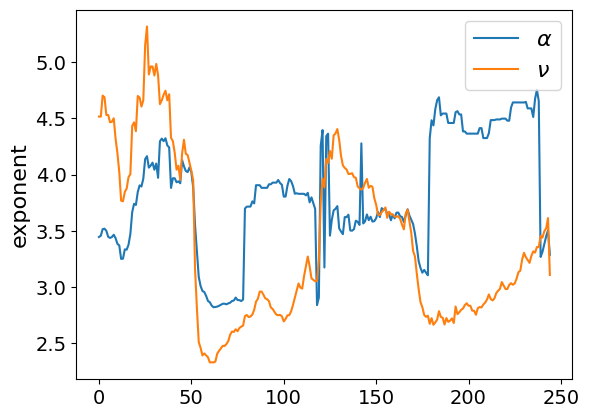

In [50]:
# To plot with pandas it's easier
pd.DataFrame(estimators,columns=[r'$α$',r'$\nu$']).plot()

plt.tick_params(labelsize=14)
plt.ylabel('exponent',fontsize=16)
plt.legend(fontsize=16)

In [51]:
# Fitting the exponent is not easy. Probably 1000 are not enough points

In [52]:
# If you have time for waiting, try with 2000 elements


T = partial_returns.shape[0]

dt=2000 
estimators = []
for t in np.arange(0,T-dt,15): 
    
    rs = partial_returns.iloc[t:t+dt]
    
    v = st.t.fit( rs )[0]
    estimators.append( ( pl.Fit( abs(rs) ).alpha, v ) )
    print(estimators[-1])

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0223797198539715, 3.0284977577663206)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0284657852339247, 3.03419025740887)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0421542121836866, 3.058800744822453)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.042258643124409, 3.0793388082158524)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0428136915083965, 3.05959420258373)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.034383637905751, 3.0703529489388948)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0508813214722443, 3.0574335290454266)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.077723334771966, 3.0687372775853077)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0715963665775123, 3.044534885340461)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.080632600923047, 3.034619463170467)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.074225264534743, 2.9943636298216023)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.068403848066752, 2.963493783683406)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.050390748410364, 2.9607323846239324)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.073321095584307, 2.9676998883056136)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.266247803860859, 2.9558814725246956)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.236881206933047, 2.956036069410408)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.223847107511624, 2.9616456116488)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.11080641901005, 2.97958714949098)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.1576740825794563, 3.042089798775689)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1579047869671735, 3.0059279802782726)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1535307530169483, 2.9915536025933527)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.165281332946264, 3.014232438120911)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1583670325139117, 3.008943577964202)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.13718864633308, 2.9689412278048097)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.140291413434596, 2.96906005483809)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1188333943118813, 3.0096226445816683)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1291337937121693, 3.0144161694799676)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1225275023529253, 2.9864020658641977)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1193905636564043, 2.95938441402674)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.114805639194472, 2.9277504343525096)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1063376157996183, 2.9172150963737105)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.1158083343559486, 2.9388981911539283)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.112870754034496, 2.926907220332123)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1249675194754656, 2.8914732875747937)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0747364641908117, 2.886709058716676)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.105483019906049, 2.90320413225015)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0975060239960244, 2.912061549482135)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.113704321525504, 2.942679432515137)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.091501439101076, 2.9891332384464766)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0955805207469607, 3.029256493553932)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.08728589197605, 3.0133202539550257)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0988821481994373, 3.0310290060567824)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1272712262117315, 2.996712115642522)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.124250736425796, 2.998844130469976)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.118438714406908, 2.9985929816421053)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.149325601845459, 3.069142934227997)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1803371856388707, 3.1440067423384352)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.150463649299778, 3.0844341745925448)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1005299577410734, 3.008205881711344)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0918123586453303, 2.9707881708968946)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0827228821324986, 2.9721951476883524)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0746958957242936, 2.956250021290324)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.094032678175449, 2.9740829568892773)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.090380328058917, 2.9996479466106454)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0914328912591134, 3.0072877159327875)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1060961963226097, 3.0295841044132024)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.132435137997772, 3.0367333450124296)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.127648140590071, 3.0766745446626396)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.113367086961239, 3.075973487125582)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0978208960269282, 3.0525268660315312)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0997801919638324, 3.0429993201285077)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.094991617939651, 3.05157765045733)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1085082404423607, 3.0524534695793357)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0887584116434885, 3.0730863601407474)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.072255214452188, 3.0614004165153594)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0623595439238254, 3.0663168254305813)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.088708575745351, 3.0801717592335036)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1233950291671673, 3.078704614237189)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.104786073460214, 3.0886832067686485)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.097111532928542, 3.0861052854325557)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.13385277480531, 3.0785240456805134)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.142778616876667, 3.1131809642215016)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.142778616876667, 3.1102859489481474)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.137887719599572, 3.096293953427029)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1303065136773163, 3.112258303512594)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.126965025013101, 3.1103010373525217)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1303059526570642, 3.1132832585112915)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1372750818412003, 3.1402211878925943)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.149433256446246, 3.1520656133625886)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1603532749561527, 3.2112081520931897)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.128582761052458, 3.1969199444833425)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1194031923616232, 3.1733730645980125)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.119980158198985, 3.1417959908189586)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1515818645267806, 3.134025859453766)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.155050170297404, 3.1195219072866354)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1245049376301566, 3.116416713289362)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.167465472701587, 3.1714022562681405)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.1683007988247973, 3.2090332146273894)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1247147488792257, 3.1862560807230436)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1126231072411605, 3.1704884232897816)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1134374046296442, 3.1722454585924282)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.1084855996965715, 3.166877998567985)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1067796704218607, 3.156212167372546)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.0987183169430073, 3.1237969281084292)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.102280401336876, 3.119313905614236)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0752013052437035, 3.1113195303243635)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0710565428626904, 3.080514499160043)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.057955184325554, 3.0657746435737976)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.04486140307688, 3.047595490893814)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0398825777612806, 3.061841095315843)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0338435416278315, 3.0539160032166905)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0446395771991135, 3.047083316405776)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.0405994963, 3.03842793967939)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.012008250420827, 3.0060629645804235)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.990429058675004, 2.983389355647639)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.98401075777869, 2.9769414351337073)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.949517724299405, 2.9367228077766443)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.9173875425686897, 2.917672822334583)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(2.900685727798484, 2.9076680660514014)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.965549844752006, 2.8737080378131585)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9341479797065806, 2.859781867264987)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.9747356859830707, 2.90397173339791)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9325515695074325, 2.913539331526352)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.020299501209597, 2.9217944754421854)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9104210114511617, 2.905236072616438)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9557643377244243, 2.8614897731126465)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.9557643377244243, 2.8767314766072714)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.946511772922288, 2.8902302384711565)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.9217294864327803, 2.90105611313264)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.021085969561185, 2.9822348301027874)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.19843646466895, 3.1428274672743077)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.6100530209245387, 3.2234600800951663)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.003386002739682, 3.188978397196075)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.213810877393876, 3.2556275583461787)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.200264410172524, 3.258944943357983)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.047289200578383, 3.2722335220544894)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.664925310041387, 3.33559678123148)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.711242762576831, 3.35137708654487)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.30051916479287, 3.3304177627493674)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.723912137142602, 3.386080777335282)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.720657823316454, 3.360962408530537)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6067141425340687, 3.3408475168448355)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.690122141181164, 3.3416886450810854)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.690122141181164, 3.315716526362356)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.6742411798939454, 3.291576831424606)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.685764671134145, 3.2754916387950477)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.270909345017776, 3.247221903256298)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.270909345017776, 3.229029509981257)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(4.270909345017776, 3.241092314667311)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(2.9469638950261663, 3.2408917128272403)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(4.286574449430239, 3.229609591607145)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.151999394060554, 3.2340073489982473)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.14721758884624, 3.2600197803757562)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1610859974722034, 3.2805718688230807)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1888648758840543, 3.300048566504671)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.2273512421430217, 3.3041259872943742)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1908070021185746, 3.2523588246524744)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.194762554289428, 3.262651813950691)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.2206905616511134, 3.265572145364974)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.184734823779017, 3.251854409003795)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.208012493429201, 3.217720166131683)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.202424703250975, 3.2082080872471073)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.1923201588493066, 3.21087481090982)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.2635848654392112, 3.2117688786139613)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3502439182444603, 3.1997425189736353)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.355234767556573, 3.235380926972976)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.348293177913906, 3.210602590418903)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3005173787747717, 3.21399220359593)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.304807282461968, 3.2199383355736906)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.304807282461968, 3.2271263142166937)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3695688613223376, 3.2510108019525186)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3693221229424966, 3.2554255951468503)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3693221229424966, 3.293514601228256)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3697030589630295, 3.322687766242886)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3201860465944, 3.301416658671684)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.368863582723163, 3.2806936843036594)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.2464968211863727, 3.291670595716629)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.271643074694451, 3.3374072888903776)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.263133637677887, 3.296376290526344)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.3078685821253306, 3.2891152977252665)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.3206310962327077, 3.2817346375102403)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.3503515201341725, 3.2628250814477386)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.322210620036758, 3.2268538602444323)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.290751340381884, 3.1727832708670745)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.308080457246063, 3.1336940928019485)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.280042418763229, 3.1190372503589954)
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


(3.2947794914889834, 3.080688087874612)


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
(3.2333297190726493, 2.9607448824563223)


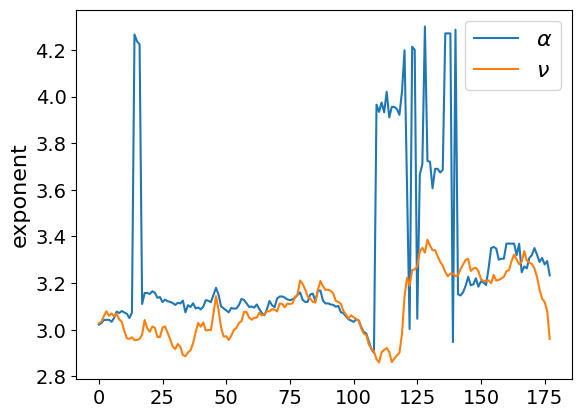

In [53]:

pd.DataFrame(estimators,columns=[r'$α$',r'$\nu$']).plot()
plt.tick_params(labelsize=14)
plt.ylabel('exponent',fontsize=16)
plt.legend(fontsize=16)

In [54]:
# It's not only the sample size. Dealing with real data is hard 
# It is not possible to automatize naively the analysis. Each case must be looked carefully.